In [1]:
pip install tensorflow tensorflow_hub

  Using cached tensorflow_hub-0.16.1-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached tf_keras-2.17.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached tensorflow-2.17.0-cp311-cp311-win_amd64.whl.metadata (3.2 kB)
  Using cached tensorflow_intel-2.17.0-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
  Using cached tensorboard-2.17.0-py3-none-any.whl.metadata (1.6 kB)
Using cached tensorflow_hub-0.16.1-py2.py3-none-any.whl (30 kB)
Using cached tf_keras-2.17.0-py3-none-any.whl (1.7 MB)
Using cached tensorflow-2.17.0-cp311-cp311-win_amd64.whl (2.0 kB)
Using cached tensorflow_intel-2.17.0-cp311-cp311-win_amd64.whl (385.0 MB)
Using cached tensorboard-2.17.0-py3-none-any.whl (5.5 MB)
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully uninstalled tensorboard-2.16.2
  Attempting uninstall: tensorflow-intel
    Found existing installation: tensorflow-intel 2.16.1
    Uninstalling tensorflow-intel-2.16.

In [2]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib.image as img
import PIL.Image as Image
import cv2

import os
import glob
import numpy as np
from pathlib import Path

In [3]:
data_dir=Path(r'E:\DataScience\Rice Type Detection\RiceClassification\Data\Rice_Image_Dataset')

arborio=list(data_dir.glob('Arborio/*'))[:600]
basmati=list(data_dir.glob('Basmati/*'))[:600]
ipsala=list(data_dir.glob('Ipsala/*'))[:600]
jasmine=list(data_dir.glob('Jasmine/*'))[:600]
karacadag=list(data_dir.glob('Karacadag/*'))[:600]

In [4]:
df_images={
    'arborio' : arborio,
    'basmati' : basmati,
    'ipsala' : ipsala,
    'jasmine' : jasmine,
    'karacadag' : karacadag
}

df_labels = {
    'arborio': 0,
    'basmati': 1,
    'ipsala': 2,
    'jasmine': 3,
    'karacadag': 4 
}

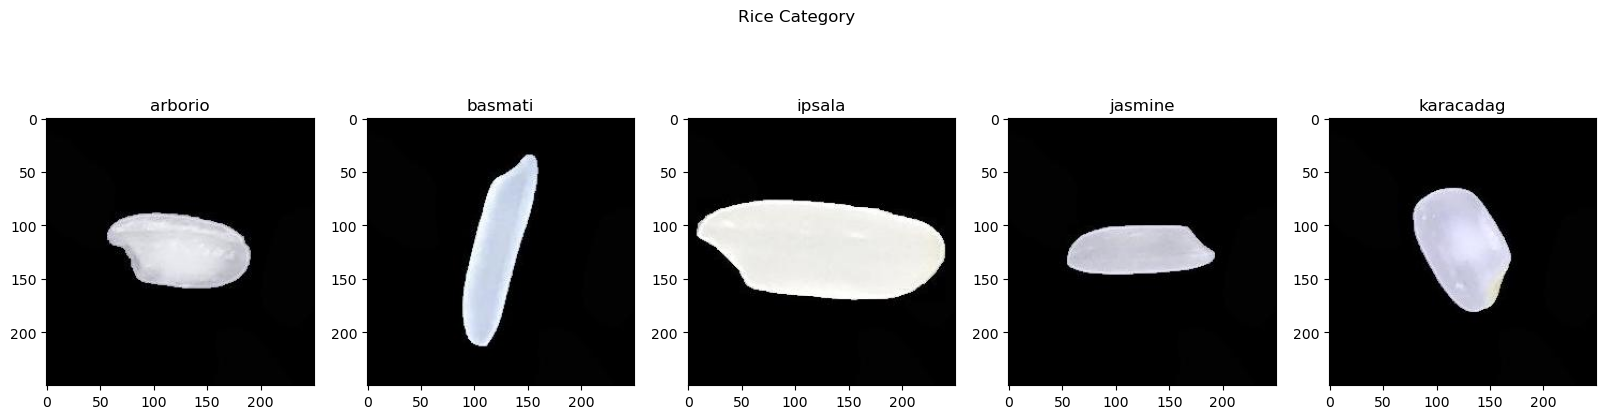

In [5]:
fig, ax=plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle('Rice Category')
arborio_image=img.imread(arborio[0])
basmati_image=img.imread(basmati[0])
ipsala_image=img.imread(ipsala[0])
jasmine_image=img.imread(jasmine[0])
karacadag_image=img.imread(karacadag[0])

ax[0].set_title('arborio')
ax[1].set_title('basmati')
ax[2].set_title('ipsala')
ax[3].set_title('jasmine')
ax[4].set_title('karacadag')

ax[0].imshow(arborio_image)
ax[1].imshow(basmati_image)
ax[2].imshow(ipsala_image)
ax[3].imshow(jasmine_image)
ax[4].imshow(karacadag_image)

In [6]:
X, y= [], []
for label, images in df_images.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img, (224,224))
        X.append(resized_img)
        y.append(df_labels[label])

In [7]:
X=np.array(X)
X=X/255
y=np.array(y)

In [8]:
X_train, X_test_val, y_train, y_test_val=train_test_split(X, y)
X_test, X_val, y_test, y_val= train_test_split(X_test_val, y_test_val)

In [9]:
mobile_net = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4' # MobileNetv4 link
mobile_net = hub.KerasLayer(
        mobile_net, input_shape=(224,224, 3), trainable=False) # Removing the last layer

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNet

num_label = 5  # number of labels

# Load the MobileNet model without the top classification layer
mobile_net = MobileNet(include_top=False, input_shape=(224, 224, 3), pooling='avg')

# Create a Sequential model and add MobileNet as the base
model = models.Sequential([
    mobile_net,
    layers.Dense(num_label, activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional)      │ ?                           │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 3,206,976 (12.23 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [11]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

In [12]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10


E:\AI\anaconda\Lib\site-packages\keras\src\backend\tensorflow\nn.py:625: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


71/71 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - acc: 0.8976 - loss: 0.3088 - val_acc: 0.7394 - val_loss: 1.2853
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - acc: 0.9816 - loss: 0.0459 - val_acc: 0.9362 - val_loss: 0.2329
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step - acc: 0.9845 - loss: 0.0519 - val_acc: 0.9734 - val_loss: 0.0838
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - acc: 0.9952 - loss: 0.0167 - val_acc: 0.9415 - val_loss: 0.1701
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - acc: 0.9869 - loss: 0.0366 - val_acc: 0.9894 - val_loss: 0.0357
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - acc: 0.9957 - loss: 0.0125 - val_acc: 0.8777 - val_loss: 0.4885
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - acc: 0.9953 - loss: 0.0107 - val_acc: 0.9947 - val_loss: 0.0116
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - acc: 0.9852 - loss: 0.0481 - val_acc: 1.0000 - val_loss: 0.0117
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - acc: 0.9969 - loss: 0.

In [13]:
model.evaluate(X_test,y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 419ms/step - acc: 0.9375 - loss: 0.1616


[0.18419337272644043, 0.9323843121528625]

In [14]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 929ms/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       114
           1       0.79      1.00      0.89       135
           2       0.98      1.00      0.99       102
           3       1.00      0.69      0.81       115
           4       0.99      1.00      0.99        96

    accuracy                           0.93       562
   macro avg       0.95      0.93      0.94       562
weighted avg       0.95      0.93      0.93       562



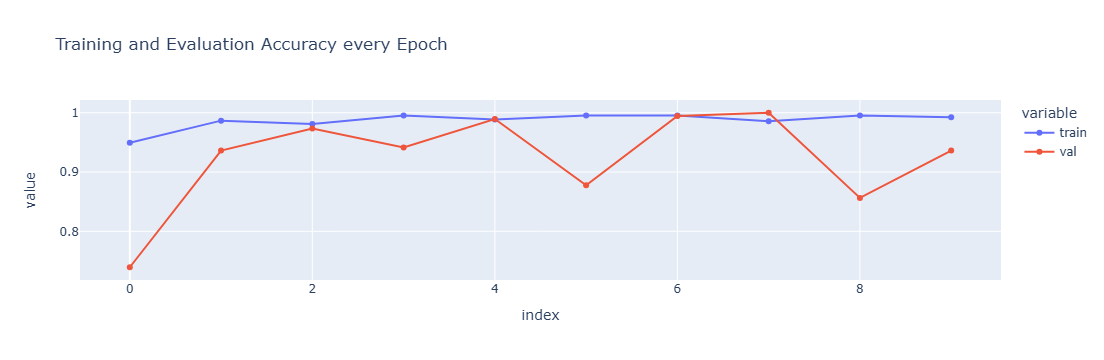

In [15]:
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import pandas as pd

init_notebook_mode(connected=True)

acc = pd.DataFrame({'train': history.history['acc'], 'val': history.history['val_acc']})

fig = px.line(acc, x=acc.index, y=acc.columns[0::], title='Training and Evaluation Accuracy every Epoch', markers=True)
fig.show()

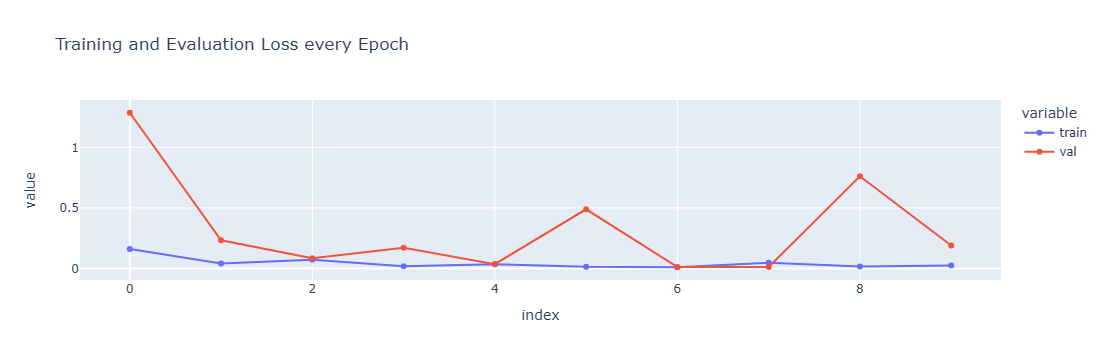

In [16]:
loss = pd.DataFrame({'train': history.history['loss'], 'val': history.history['val_loss']})

fig = px.line(loss, x=loss.index, y=loss.columns[0::], title='Training and Evaluation Loss every Epoch', markers=True)
fig.show()

In [17]:
X_test[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [18]:
X_test.shape

(562, 224, 224, 3)

In [19]:
a1 = cv2.imread("E:\DataScience\Rice Type Detection\RiceClassification\Data\Rice_Image_Dataset\Arborio\Arborio (3).jpg")

In [20]:
a1 = cv2.resize(a1,(224,224))

In [21]:
a1 = np.array(a1)

In [22]:
a1 = a1/255

In [23]:
a1 = np.expand_dims(a1, 0)

In [24]:
pred = model.predict(a1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [25]:
pred = pred.argmax()
pred

0

In [26]:
for i, j in df_labels.items():
    if pred == j:
        print(i)

arborio


In [27]:
a2 = cv2.imread("E:\DataScience\Rice Type Detection\RiceClassification\Data\Rice_Image_Dataset\Karacadag\Karacadag (10).jpg")
a2 = cv2.resize(a2,(224,224))
a2 = np.array(a2)
a2 = a2/255
a2 = np.expand_dims(a2, 0)
a2.shape

(1, 224, 224, 3)

In [28]:
model.save("rice.h5")